<a href="https://colab.research.google.com/github/Solostriker/SunkalpChandra_HTHS-1-10-24_Research/blob/main/bl2_2_stx16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sn

<ipython-input-3-30ccbcb3e025>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Cq Mean', 'Cq Std. Dev']] = scaler.fit_transform(X[['Cq Mean', 'Cq Std. Dev']].copy())


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.1625 - accuracy: 0.0000e+00 - val_loss: 2.6203 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 74ms/step - loss: 1.9931 - accuracy: 0.0000e+00 - val_loss: 2.3708 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 1.8296 - accuracy: 0.0000e+00 - val_loss: 2.1288 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 70ms/step - loss: 1.6709 - accuracy: 0.0000e+00 - val_loss: 1.8956 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 112ms/step - loss: 1.5195 - accuracy: 0.0000e+00 - val_loss: 1.6730 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 71ms/step - loss: 1.3761 - accuracy: 0.0000e+00 - val_loss: 1.4633 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 99ms/step - loss: 1.2409 - accuracy: 0.0000e+00 - val_loss: 1.2687

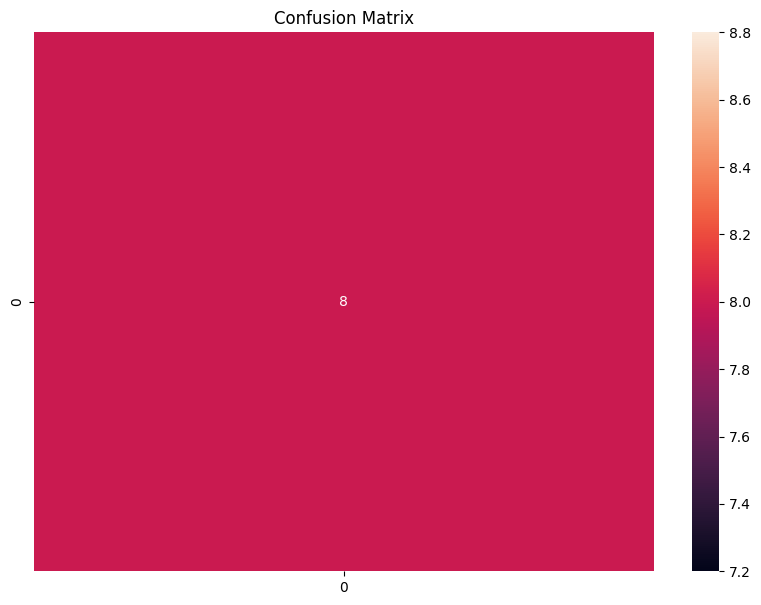

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


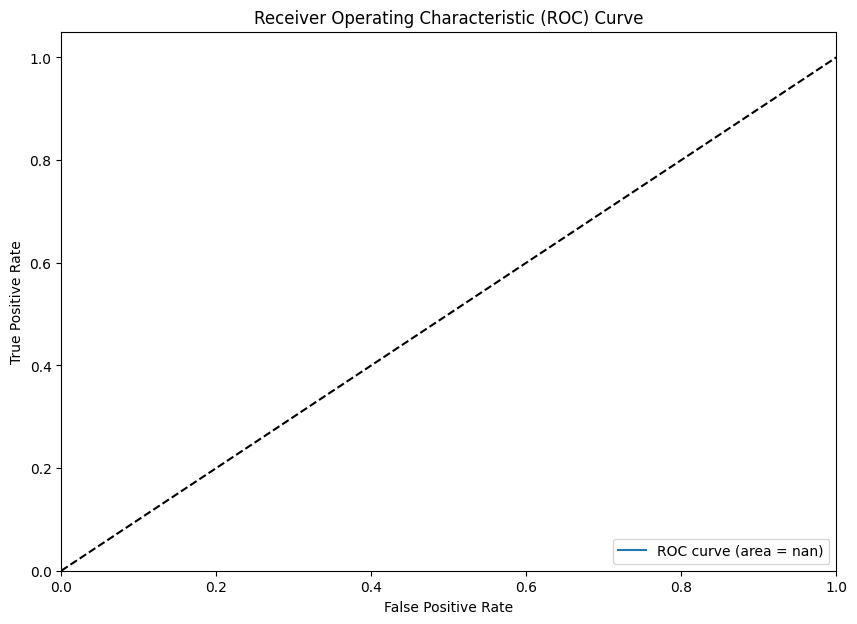

In [ ]:
filepath = '/content/sample_data/data.xlsx'

df = pd.read_excel(filepath)

df = df.dropna(subset=['Cq'])

label_encoder = LabelEncoder()
df['Fluor'] = label_encoder.fit_transform(df['Fluor'])
df['Target'] = label_encoder.fit_transform(df['Target'])
df['Content'] = label_encoder.fit_transform(df['Content'])

features = ['Fluor', 'Target', 'Content', 'Cq Mean', 'Cq Std. Dev']
target = 'Microplastics Exposure'

X = df[features]
y = df[target]

y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X[['Cq Mean', 'Cq Std. Dev']] = scaler.fit_transform(X[['Cq Mean', 'Cq Std. Dev']].copy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy on the test set: {accuracy}')

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_feature_importance(importance, feature_names):
    plt.figure(figsize=(10, 7))
    sn.barplot(x=importance, y=feature_names)
    plt.title('Feature Importance')
    plt.show()

y_true = y_test
y_proba = model.predict(X_test)

plot_confusion_matrix(y_true, y_pred_binary)
plot_roc_curve(y_true, y_proba)
